In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load data
df = pd.read_csv("../data/clean/waiting_times_with_prediction.csv")

In [4]:
df.head()

,Unnamed: 0,attraction,date,minute,SPOSTMIN,SACTMIN,predicted_actual_time
0,0,7_dwarfs_train,2015-01-01,0,0.0,NaN,0.0
1,1,7_dwarfs_train,2015-01-01,30,0.0,NaN,0.0
2,2,7_dwarfs_train,2015-01-01,60,0.0,NaN,0.0
3,3,7_dwarfs_train,2015-01-01,90,0.0,NaN,0.0
4,4,7_dwarfs_train,2015-01-01,120,0.0,NaN,0.0


In [6]:
df.columns

Index(['Unnamed: 0', 'attraction', 'date', 'minute', 'SPOSTMIN', 'SACTMIN',
       'predicted_actual_time'],
      dtype='object')

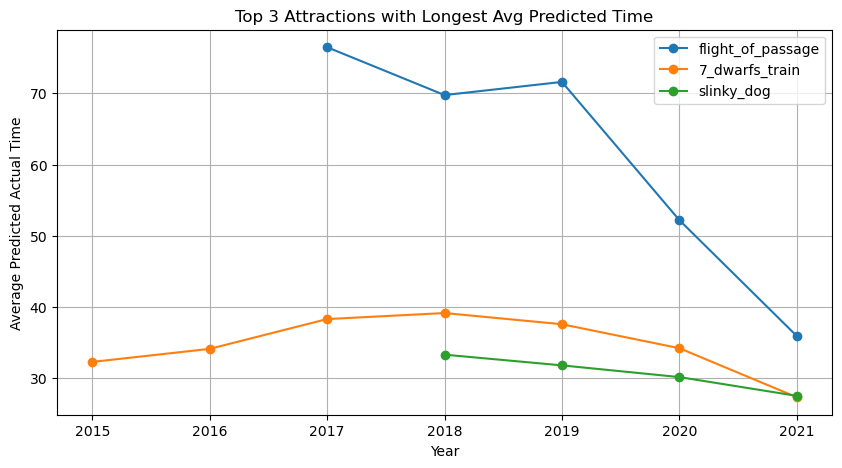

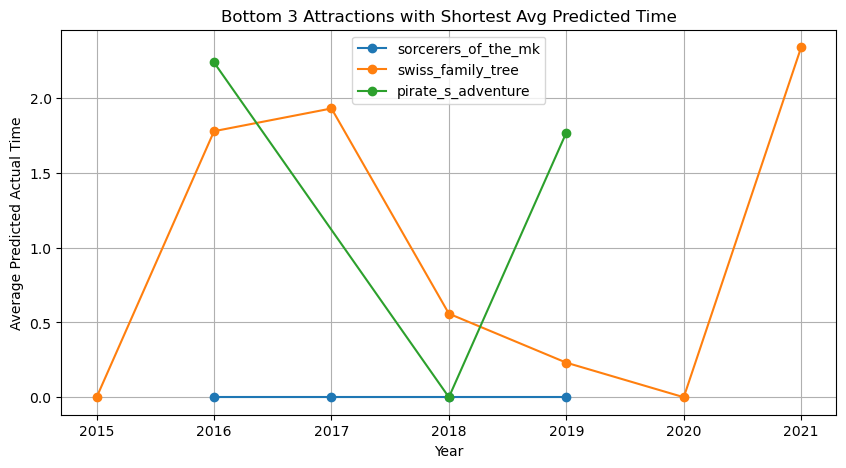

In [7]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group by attraction and year, then calculate average predicted_actual_time
avg_time_per_attraction = df.groupby(['attraction', 'year'])['predicted_actual_time'].mean().reset_index()

# Find top 3 attractions with longest average predicted_actual_time
top_3 = avg_time_per_attraction.groupby('attraction')['predicted_actual_time'].mean().nlargest(3).index
bottom_3 = avg_time_per_attraction.groupby('attraction')['predicted_actual_time'].mean().nsmallest(3).index

# Filter for top 3 attractions
top_3_df = avg_time_per_attraction[avg_time_per_attraction['attraction'].isin(top_3)]
bottom_3_df = avg_time_per_attraction[avg_time_per_attraction['attraction'].isin(bottom_3)]

# Plot top 3 attractions
plt.figure(figsize=(10, 5))
for attraction in top_3:
    subset = top_3_df[top_3_df['attraction'] == attraction]
    plt.plot(subset['year'], subset['predicted_actual_time'], marker='o', label=attraction)
plt.xlabel('Year')
plt.ylabel('Average Predicted Actual Time')
plt.title('Top 3 Attractions with Longest Avg Predicted Time')
plt.legend()
plt.grid()
plt.show()

# Plot bottom 3 attractions
plt.figure(figsize=(10, 5))
for attraction in bottom_3:
    subset = bottom_3_df[bottom_3_df['attraction'] == attraction]
    plt.plot(subset['year'], subset['predicted_actual_time'], marker='o', label=attraction)
plt.xlabel('Year')
plt.ylabel('Average Predicted Actual Time')
plt.title('Bottom 3 Attractions with Shortest Avg Predicted Time')
plt.legend()
plt.grid()
plt.show()


/var/folders/73/k6s_wxgs1ndcqqqks3k33plm0000gn/T/ipykernel_62672/2622860351.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_per_year = avg_time_per_attraction.groupby('year').apply(lambda x: x.nlargest(3, 'predicted_actual_time')).reset_index(drop=True)
/var/folders/73/k6s_wxgs1ndcqqqks3k33plm0000gn/T/ipykernel_62672/2622860351.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_3_per_year

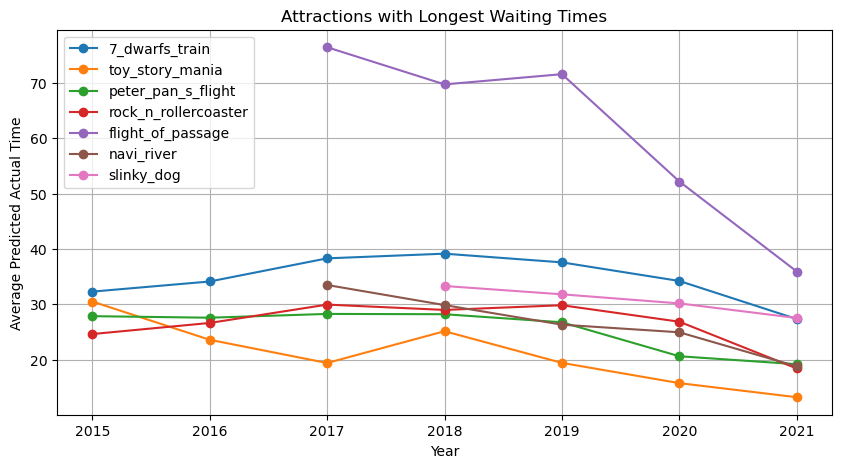

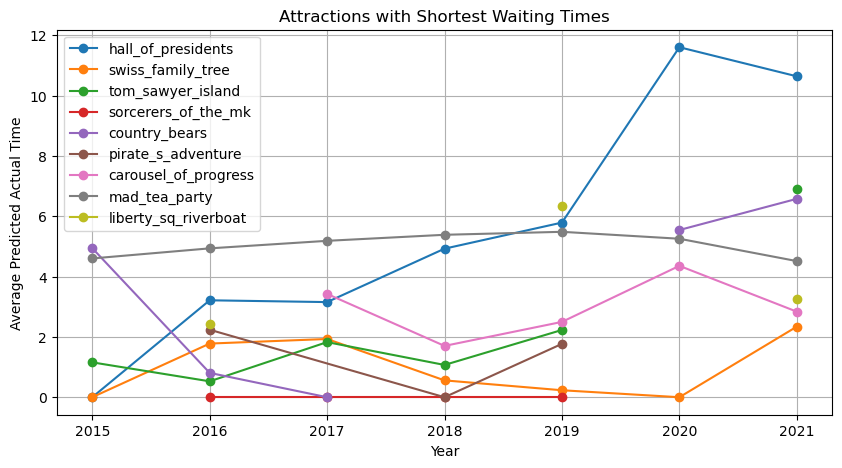

In [13]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group by attraction and year, then calculate average predicted_actual_time
avg_time_per_attraction = df.groupby(['attraction', 'year'])['predicted_actual_time'].mean().reset_index()

# Find top 3 and bottom 3 attractions for each year
top_3_per_year = avg_time_per_attraction.groupby('year').apply(lambda x: x.nlargest(3, 'predicted_actual_time')).reset_index(drop=True)
bottom_3_per_year = avg_time_per_attraction.groupby('year').apply(lambda x: x.nsmallest(3, 'predicted_actual_time')).reset_index(drop=True)

# Get unique top and bottom attractions over the years
top_attractions = top_3_per_year['attraction'].unique()
bottom_attractions = bottom_3_per_year['attraction'].unique()

# Filter dataset for only these attractions
top_attractions_df = avg_time_per_attraction[avg_time_per_attraction['attraction'].isin(top_attractions)]
bottom_attractions_df = avg_time_per_attraction[avg_time_per_attraction['attraction'].isin(bottom_attractions)]

# Plot top attractions over the years
plt.figure(figsize=(10, 5))
for attraction in top_attractions:
    subset = top_attractions_df[top_attractions_df['attraction'] == attraction]
    plt.plot(subset['year'], subset['predicted_actual_time'], marker='o', label=attraction)
plt.xlabel('Year')
plt.ylabel('Average Predicted Actual Time')
plt.title('Attractions with Longest Waiting Times')
plt.legend()
plt.grid()
plt.savefig('../data/visuals/top_attractions.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot bottom attractions over the years
plt.figure(figsize=(10, 5))
for attraction in bottom_attractions:
    subset = bottom_attractions_df[bottom_attractions_df['attraction'] == attraction]
    plt.plot(subset['year'], subset['predicted_actual_time'], marker='o', label=attraction)
plt.xlabel('Year')
plt.ylabel('Average Predicted Actual Time')
plt.title('Attractions with Shortest Waiting Times')
plt.legend()
plt.grid()
plt.savefig('../data/visuals/bottom_attractions.png', dpi=300, bbox_inches='tight')
plt.show()


/var/folders/73/k6s_wxgs1ndcqqqks3k33plm0000gn/T/ipykernel_62672/3111804799.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_season = avg_time_per_attraction.groupby('season').apply(lambda x: x.nlargest(5, 'predicted_actual_time')).reset_index(drop=True)
/var/folders/73/k6s_wxgs1ndcqqqks3k33plm0000gn/T/ipykernel_62672/3111804799.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_5_per

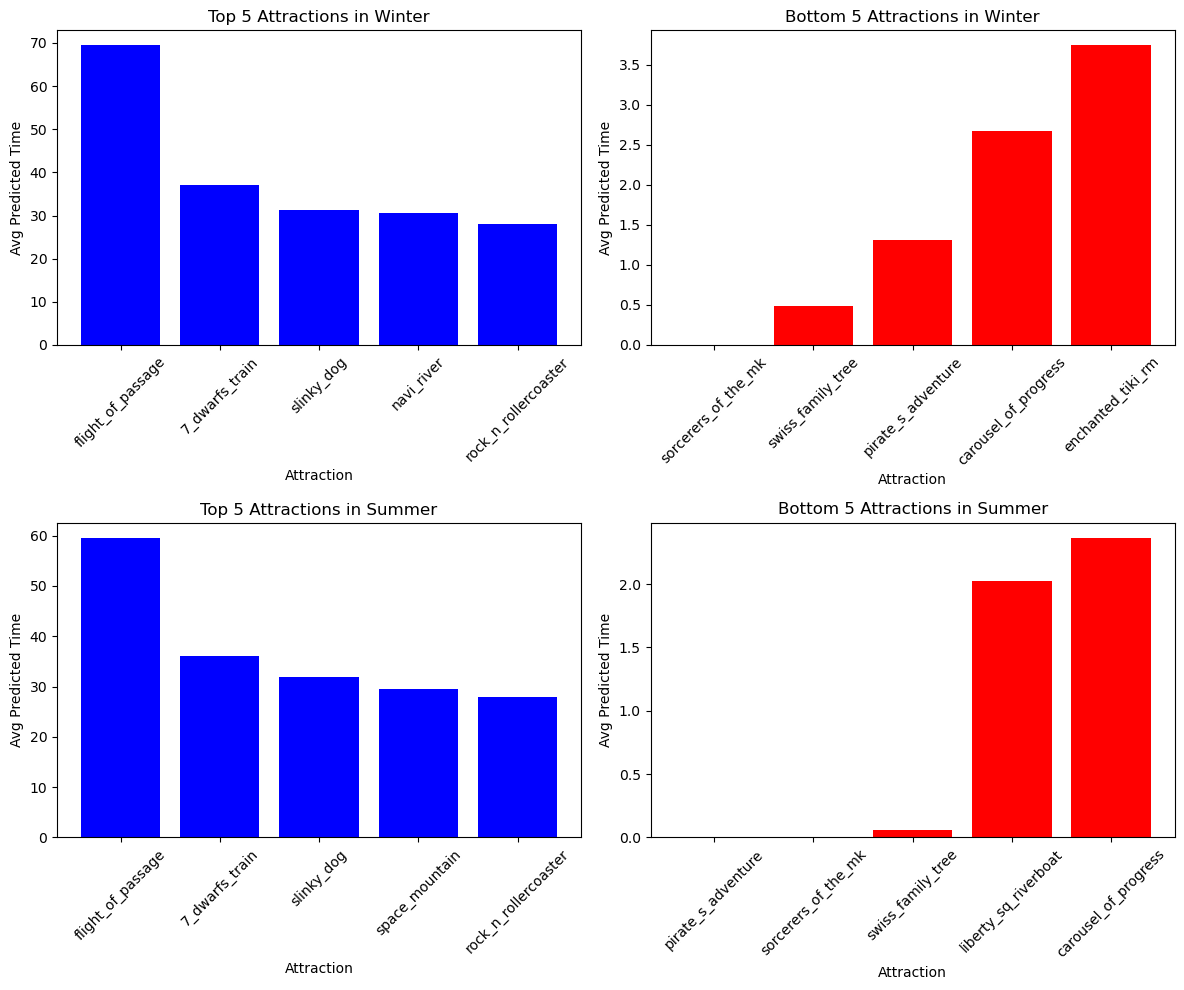

In [15]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Define seasons: Winter (Dec, Jan, Feb) and Summer (Jun, Jul, Aug)
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Summer' if x in [6, 7, 8] else 'Other'))
df_seasonal = df[df['season'].isin(['Winter', 'Summer'])]

# Group by attraction and season, then calculate average predicted_actual_time
avg_time_per_attraction = df_seasonal.groupby(['attraction', 'season'])['predicted_actual_time'].mean().reset_index()

# Find top 5 and bottom 5 attractions for each season
top_5_per_season = avg_time_per_attraction.groupby('season').apply(lambda x: x.nlargest(5, 'predicted_actual_time')).reset_index(drop=True)
bottom_5_per_season = avg_time_per_attraction.groupby('season').apply(lambda x: x.nsmallest(5, 'predicted_actual_time')).reset_index(drop=True)

# Create bar charts for top and bottom attractions in Winter and Summer
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
seasons = ['Winter', 'Summer']

for i, season in enumerate(seasons):
    top_subset = top_5_per_season[top_5_per_season['season'] == season]
    bottom_subset = bottom_5_per_season[bottom_5_per_season['season'] == season]
    
    # Top 5 bar chart
    axes[i, 0].bar(top_subset['attraction'], top_subset['predicted_actual_time'], color='blue')
    axes[i, 0].set_title(f'Top 5 Attractions in {season}')
    axes[i, 0].set_xlabel('Attraction')
    axes[i, 0].set_ylabel('Avg Predicted Time')
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Bottom 5 bar chart
    axes[i, 1].bar(bottom_subset['attraction'], bottom_subset['predicted_actual_time'], color='red')
    axes[i, 1].set_title(f'Bottom 5 Attractions in {season}')
    axes[i, 1].set_xlabel('Attraction')
    axes[i, 1].set_ylabel('Avg Predicted Time')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
